In [36]:
### Install Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [37]:
### Import Dataset:

ds = pd.read_csv("./data/Titanic-Dataset.csv")

# Separating our dependend and independent variable:
#x = ds[["Sex","Age","SibSp","Parch","Pclass","Fare"]].values

# Using only sex,age,Pclass as feature resulted in highest accuracy from the logistical Regression model
x = ds[["Sex","Age","Pclass"]].values
print(x)
y = ds[["Survived"]].values




[['male' 22.0 3]
 ['female' 38.0 1]
 ['female' 26.0 3]
 ...
 ['female' nan 3]
 ['male' 26.0 1]
 ['male' 32.0 3]]


In [38]:

# Cleaning Data so that NaN gets filled with mean for age.
print("Before Cleaning: ")
print(x[:,1])
# Imputer expects a 2D array, thus we need to transform our x from 1D to 2D 
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# Ravel reflattens 2D back to 1D for assignment
x[:,1] = imputer.fit_transform(x[:,1].reshape(-1,1)).ravel()
print("After Cleaning")
print(x[:,1])



Before Cleaning: 
[22.0 38.0 26.0 35.0 35.0 nan 54.0 2.0 27.0 14.0 4.0 58.0 20.0 39.0 14.0
 55.0 2.0 nan 31.0 nan 35.0 34.0 15.0 28.0 8.0 38.0 nan 19.0 nan nan 40.0
 nan nan 66.0 28.0 42.0 nan 21.0 18.0 14.0 40.0 27.0 nan 3.0 19.0 nan nan
 nan nan 18.0 7.0 21.0 49.0 29.0 65.0 nan 21.0 28.5 5.0 11.0 22.0 38.0
 45.0 4.0 nan nan 29.0 19.0 17.0 26.0 32.0 16.0 21.0 26.0 32.0 25.0 nan
 nan 0.83 30.0 22.0 29.0 nan 28.0 17.0 33.0 16.0 nan 23.0 24.0 29.0 20.0
 46.0 26.0 59.0 nan 71.0 23.0 34.0 34.0 28.0 nan 21.0 33.0 37.0 28.0 21.0
 nan 38.0 nan 47.0 14.5 22.0 20.0 17.0 21.0 70.5 29.0 24.0 2.0 21.0 nan
 32.5 32.5 54.0 12.0 nan 24.0 nan 45.0 33.0 20.0 47.0 29.0 25.0 23.0 19.0
 37.0 16.0 24.0 nan 22.0 24.0 19.0 18.0 19.0 27.0 9.0 36.5 42.0 51.0 22.0
 55.5 40.5 nan 51.0 16.0 30.0 nan nan 44.0 40.0 26.0 17.0 1.0 9.0 nan 45.0
 nan 28.0 61.0 4.0 1.0 21.0 56.0 18.0 nan 50.0 30.0 36.0 nan nan 9.0 1.0
 4.0 nan nan 45.0 40.0 36.0 32.0 19.0 19.0 3.0 44.0 58.0 nan 42.0 nan 24.0
 28.0 nan 34.0 45.5 18.0 2.0

In [39]:
### Label Encoder 
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
print(x)


[[1 22.0 3]
 [0 38.0 1]
 [0 26.0 3]
 ...
 [0 29.69911764705882 3]
 [1 26.0 1]
 [1 32.0 3]]


In [40]:
# Splitting the dataset into training,test sets:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, train_size=0.8, random_state=1)

In [41]:
# Training Logistic Regression Model:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train.ravel())

# Predicting with our test case
# y_pred returned in 1D array
y_pred = model.predict(x_test)



In [42]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test.ravel(),y_pred)
print(cm)
accuracy_score(y_test.ravel(),y_pred)

# Result shows 90 Correct prediction of death, 21 wrong prediction of death
# Shows 52 correct prediction of survival, 16 wrong predicton of survival
# Overall a 79% accuracy 

[[91 15]
 [19 54]]


0.8100558659217877

In [43]:
# Exploring how posisbly standardization of age could affect accuracy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [44]:
#  Training again on standardize x 
print(x_train)
print(x_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train.ravel())

# Predicting with our test case
# y_pred returned in 1D array
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test.ravel(),y_pred)
print(cm)
accuracy_score(y_test.ravel(),y_pred)


[[ 0.73334642 -0.02810499  0.83659324]
 [-1.36361202 -0.00541218 -1.55559305]
 [-1.36361202  0.29627125 -0.35949991]
 ...
 [ 0.73334642 -0.6841999  -0.35949991]
 [-1.36361202 -0.02810499  0.83659324]
 [ 0.73334642 -0.6841999   0.83659324]]
[[-1.36361202  1.35216325 -1.55559305]
 [ 0.73334642 -0.02810499  0.83659324]
 [-1.36361202 -0.98588332 -0.35949991]
 [-1.36361202 -0.02810499  0.83659324]
 [-1.36361202 -1.74009189 -0.35949991]
 [ 0.73334642 -0.6841999   0.83659324]
 [ 0.73334642  0.48482339 -0.35949991]
 [-1.36361202  0.3716921  -1.55559305]
 [ 0.73334642 -0.1562539  -1.55559305]
 [-1.36361202 -0.02810499  0.83659324]
 [ 0.73334642 -0.38251647  0.83659324]
 [-1.36361202 -0.30709561  0.83659324]
 [ 0.73334642  1.80468839 -1.55559305]
 [ 0.73334642 -0.02810499 -0.35949991]
 [-1.36361202 -0.02810499  0.83659324]
 [ 0.73334642 -0.1562539  -1.55559305]
 [ 0.73334642 -1.51382932  0.83659324]
 [ 0.73334642 -0.45793732  0.83659324]
 [ 0.73334642  0.44711296  0.83659324]
 [-1.36361202 -0.45

0.8100558659217877

After Standardizing all independent variable of X, didn't see a change in accuracy of the logistical regression modal. So time to explore other models. 

In [45]:
#KNN Model:
from sklearn.neighbors import KNeighborsClassifier
kModel = KNeighborsClassifier(n_neighbors=5,metric="minkowski", p=2)
kModel.fit(x_train,y_train.ravel())
y_pred_2 = kModel.predict(x_test)
cm = confusion_matrix(y_test.ravel(),y_pred_2)
print(cm)
accuracy_score(y_test.ravel(),y_pred_2)

# Model Did worse apparently 

[[97  9]
 [32 41]]


0.770949720670391

In [46]:
#SVM MODEL
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model .fit(x_train, y_train.ravel())
y_pred_3 =  svm_model.predict(x_test)

cm = confusion_matrix(y_test.ravel(),y_pred_3)
print(cm)
accuracy_score(y_test.ravel(),y_pred_3)

[[90 16]
 [24 49]]


0.776536312849162

In [47]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf', random_state = 0)
svc_model.fit(x_train, y_train.ravel())
y_pred_4 = svc_model.predict(x_test)

cm = confusion_matrix(y_test.ravel(),y_pred_4)
print(cm)
accuracy_score(y_test.ravel(),y_pred_4)


[[100   6]
 [ 38  35]]


0.7541899441340782

In [48]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(x_train, y_train.ravel())
y_pred_5 = gaussian_model.predict(x_test)

cm = confusion_matrix(y_test.ravel(),y_pred_5)
print(cm)
accuracy_score(y_test.ravel(),y_pred_5)


[[89 17]
 [24 49]]


0.770949720670391

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree_model.fit(x_train, y_train.ravel())
y_pred_6 = dtree_model.predict(x_test)

cm = confusion_matrix(y_test.ravel(),y_pred_6)
print(cm)
accuracy_score(y_test.ravel(),y_pred_6)



[[94 12]
 [28 45]]


0.776536312849162

In [50]:
from sklearn.ensemble import RandomForestClassifier
rforest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rforest_model.fit(x_train, y_train.ravel())
y_pred_7 = rforest_model.predict(x_test)

cm = confusion_matrix(y_test.ravel(),y_pred_7)
print(cm)
accuracy_score(y_test.ravel(),y_pred_7)

[[82 24]
 [26 47]]


0.7206703910614525

### Redo following Berkay Dogan Kaggle Code
<p>Redoing the analysis of the data set, but following the though patterns showned by Berkay Dogan. For learning purposes!</p>

In [51]:
# Displaying Top 5 Rows and bototm 5 row:

ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# Bottom 5 cause why not
ds.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [53]:
# Getting statistics on dataset can tranpose with .T
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [54]:
#Show dataset structure (columns, dtypes, non-null counts)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



### Univariate Variable Analysis

#### Categorical Variables 📊: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp, Parch
#### Numerical Variables 🔢: Age, PassengerId, Fare

In [55]:
# Ploting a Bar Graph:
def bar_plot(variable):
    var = ds[variable]
    # Count number of occurence of unique values in a series
    varCount = var.value_counts()

    # Plot
    plt.figure(figsize=(9,3)) # Fig size: 9 width 3 height
    plt.bar(varCount.index,varCount)
    plt.xticks(varCount.index, varCount.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)

    # Print Counts:
    print(f"{variable}: \n {varCount}")

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64
Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64
Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


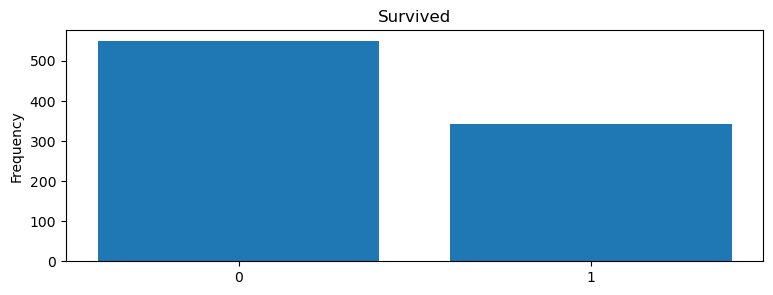

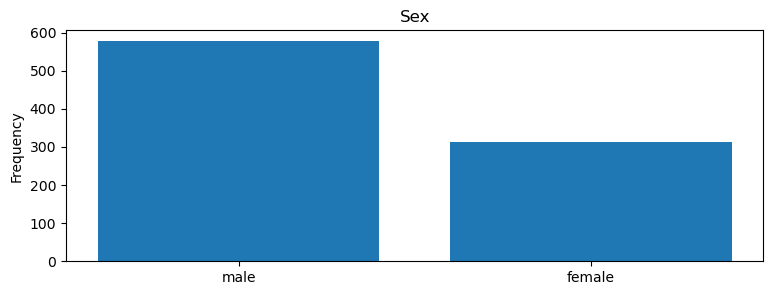

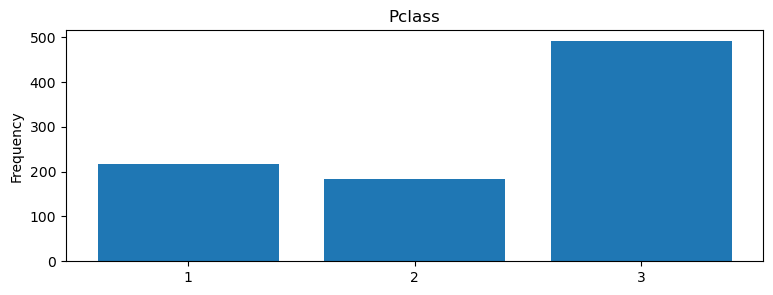

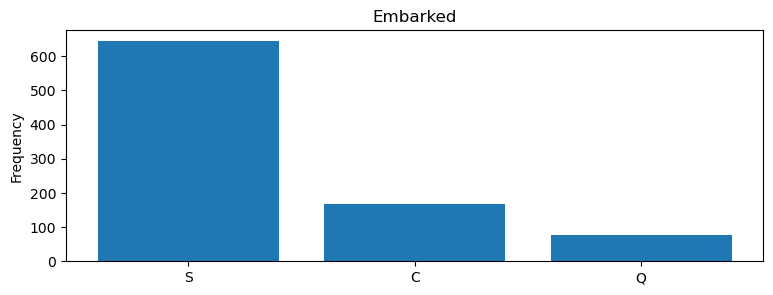

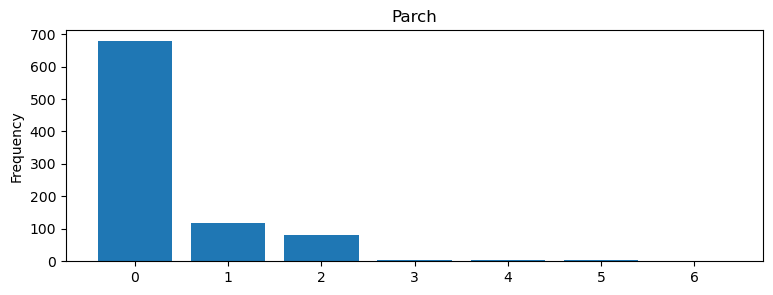

In [56]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "Parch"] 
for c in category1:
    bar_plot(c)

### Numerical Values:

- For numerical categories we use histogram to display.

In [57]:
def plot_hist(variable):

    plt.figure(figsize=(9, 3))
    plt.hist(ds[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution (Histogram)")
    plt.show()

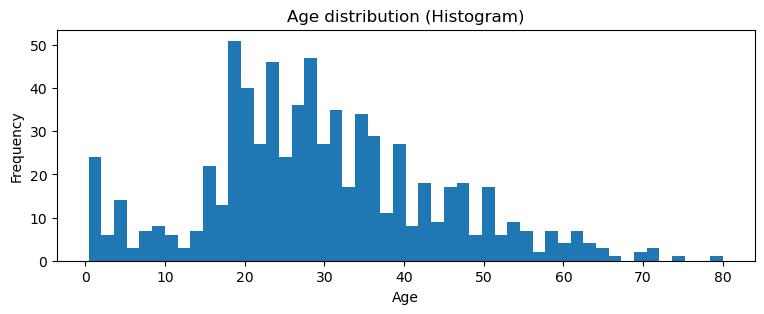

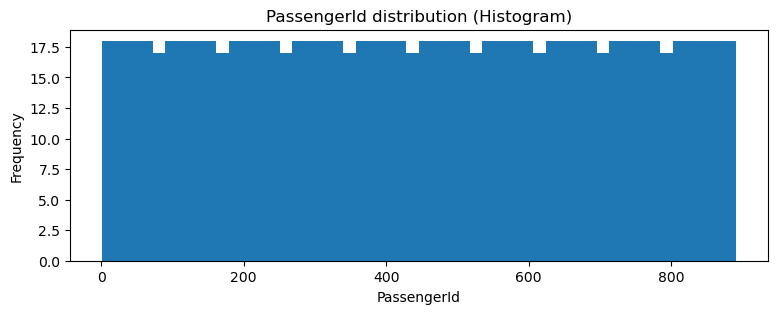

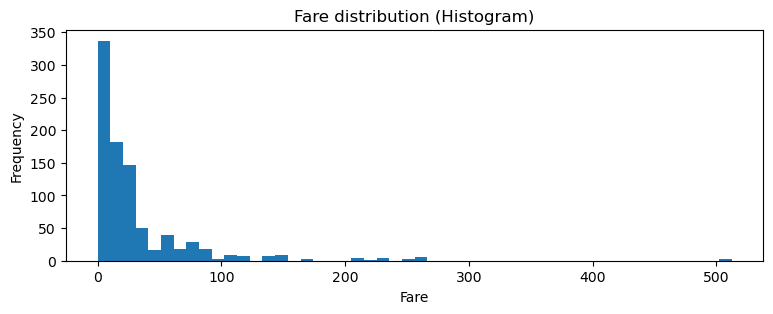

In [58]:
numeric_var = ["Age", "PassengerId", "Fare"]  
for n in numeric_var:
    plot_hist(n) 

##### Plotting Categories vs Survival:


In [64]:
ds[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [66]:
ds[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363
